In [90]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from imageio import imread
import tensorflow as tf

from preprocess import IMAGE_SIZE
from utils import plot_mask

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
IMAGE_ROOT = './data/images/'
MASK_ROOT = './data/masks/'
image_names = os.listdir(IMAGE_ROOT)
mask_names = os.listdir(MASK_ROOT)
image_paths = [IMAGE_ROOT + name for name in image_names]
mask_paths = [MASK_ROOT + name for name in mask_names]

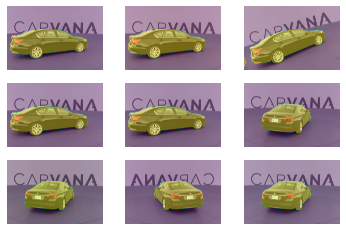

In [92]:
rows = 3
cols = 3
for i in range(rows * cols):
    ax = plt.subplot(rows, cols, i + 1)
    image = imread(image_paths[i])
    mask = imread(mask_paths[i])
    plot_mask(ax, image, mask)

In [93]:
def process_path(image_path, mask_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.cast(image, dtype=tf.float32) / 255.

    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_jpeg(mask, channels=3)
    mask = tf.cast(mask, dtype=tf.float32) / 255.
    return image, mask

def preprocess(image, mask):
    image = tf.image.resize(image, IMAGE_SIZE, method='nearest')
    mask = tf.image.resize(mask, IMAGE_SIZE, method='nearest')
    return image, mask

def load_data():
    path_ds = tf.data.Dataset.from_tensor_slices((image_paths, mask_paths))
    dataset = path_ds.map(process_path)
    dataset = dataset.map(preprocess)
    return dataset

dataset = load_data()

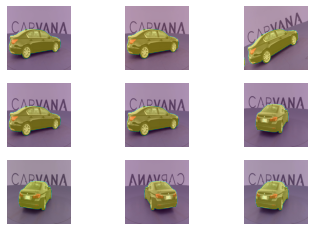

In [94]:
for i, (image, mask) in enumerate(dataset.take(9)):
    ax = plt.subplot(rows, cols, i + 1)
    plot_mask(ax, image, mask)